# Approach One - Based on the Bokk "Hands-On Transef Learning"

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display
import soundfile as sf
import glob
import random

# define the path relative to the notebook source
# expected data structure
# -----------------------------------------------
# project root
#  src
#    main.ipynb
#  data
#   original
#     audio
#       fold1
#         *.wav
#       fold2,
#         *.wav
#     metadata
#      UrbanSound8K.csv

DATA_PATH = "../data/original/"
META_FILE = "{0}{1}".format(DATA_PATH,"metadata/UrbanSound8k.csv")
# Read the metadata
metaData = pd.read_csv(META_FILE,sep = ',',header=0,names=['FileName','fsID','start','end','salience','fold',
    'ClassID', 'Class'], usecols=[0,6,7])

# grab the full paths of all sample files
paths = glob.glob("{0}/audio/**/*".format(DATA_PATH))
# create a dataframe
sounds = [] 
for path in paths:
    fn = os.path.basename(path)
    meta = metaData[metaData.FileName == fn]
    audio = sf.SoundFile(path)
    sounds.append((meta.ClassID.values[0] , meta.Class.values[0],meta.FileName.values[0], audio.channels, 
        audio.samplerate,audio.frames,audio.format, round(audio.frames/audio.samplerate,1),
        audio.subtype,path))
df = pd.DataFrame(sounds,columns=['ClassID','Class','FileName','Channels','SampleRate','Frames','Format',
                                  'Length','SubType','Path'])
df.head(20)

,ClassID,Class,FileName,Channels,SampleRate,Frames,Format,Length,SubType,Path
0,3,dog_bark,101415-3-0-2.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-2.wav
1,3,dog_bark,101415-3-0-3.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-3.wav
2,3,dog_bark,101415-3-0-8.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-8.wav
3,3,dog_bark,102106-3-0-0.wav,2,44100,72324,WAV,1.6,PCM_16,../data/original//audio\fold1\102106-3-0-0.wav
4,6,gun_shot,102305-6-0-0.wav,2,44100,115101,WAV,2.6,PCM_16,../data/original//audio\fold1\102305-6-0-0.wav
5,3,dog_bark,102842-3-0-1.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-0-1.wav
6,3,dog_bark,102842-3-1-0.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-0.wav
7,3,dog_bark,102842-3-1-5.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-5.wav
8,3,dog_bark,102842-3-1-6.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-6.wav
9,7,jackhammer,103074-7-0-0.wav,2,48000,192000,WAVEX,4.0,PCM_24,../data/original//audio\fold1\103074-7-0-0.wav


In [5]:
sampleDf=df.groupby('Class',as_index = False,group_keys=False).apply(lambda s: s.sample(1,replace=True))
sampleDf.head(10)


,ClassID,Class,FileName,Channels,SampleRate,Frames,Format,Length,SubType,Path
1857,0,air_conditioner,146690-0-0-155.wav,2,44100,176400,WAVEX,4.0,PCM_24,../data/original//audio\fold2\146690-0-0-155.wav
6436,1,car_horn,14524-1-0-0.wav,2,48000,40785,WAV,0.8,PCM_16,../data/original//audio\fold7\14524-1-0-0.wav
5617,2,children_playing,133494-2-0-18.wav,2,96000,384000,WAVEX,4.0,PCM_24,../data/original//audio\fold6\133494-2-0-18.wav
5192,3,dog_bark,34771-3-0-4.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold5\34771-3-0-4.wav
3660,4,drilling,144351-4-0-2.wav,1,96000,384000,WAVEX,4.0,PCM_24,../data/original//audio\fold4\144351-4-0-2.wav
1923,5,engine_idling,152908-5-0-4.wav,2,44100,176400,WAVEX,4.0,PCM_24,../data/original//audio\fold2\152908-5-0-4.wav
1220,6,gun_shot,169261-6-0-0.wav,1,48000,79680,WAVEX,1.7,PCM_24,../data/original//audio\fold10\169261-6-0-0.wav
3923,7,jackhammer,171305-7-16-0.wav,2,48000,50880,WAV,1.1,PCM_16,../data/original//audio\fold4\171305-7-16-0.wav
3135,8,siren,22601-8-0-36.wav,2,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold3\22601-8-0-36.wav
6277,9,street_music,101848-9-0-9.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold7\101848-9-0-9.wav


In [6]:
# function to get start and end indices for audio sub-sample
def windows(data, window_size):
 start = 0
 while start < len(data):
  yield int(start), int(start + window_size)
  start += (window_size / 2)

In [7]:
data =[1,2,3,4,5,6]
wg = windows(data,2)
for i in wg:
    print(i)

(0, 2)
(1, 3)
(2, 4)
(3, 5)
(4, 6)
(5, 7)


class:  ndarray
shape:  (128, 173)
strides:  (1384, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2584bc81b60
byteorder:  little
byteswap:  False
type: float64


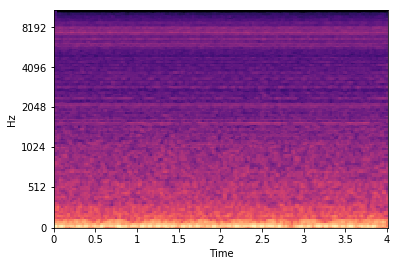

In [8]:
p = sampleDf.Path.values[0]
sample, r = sf.read(p)
y = librosa.resample(sample.T, r, 22050)
y = librosa.to_mono(y)
mel_spec = librosa.feature.melspectrogram(y=y)
np.info(mel_spec)
_ = librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
IPython.display.Audio(p)

class:  ndarray
shape:  (128, 46)
strides:  (368, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2584be690e0
byteorder:  little
byteswap:  False
type: float64


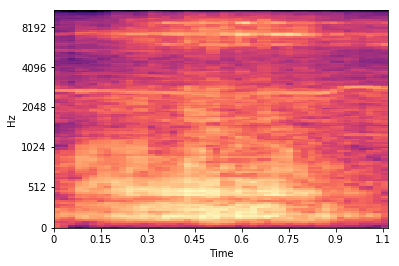

In [10]:
p2 = sampleDf.Path.values[7]
sample2, r2 = sf.read(p2)
y2 = librosa.resample(sample2.T, r2, 22050)
y2 = librosa.to_mono(y2)
mel_spec2 = librosa.feature.melspectrogram(y=y2)
mfcc2 = librosa.feature.mfcc(y2, n_mfcc=40)
np.info(mel_spec2)
p = librosa.display.specshow(librosa.power_to_db(mel_spec2, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
IPython.display.Audio(p2)

In [11]:
mfcc1 = librosa.feature.mfcc(y, n_mfcc=40)
mfcc2 = librosa.feature.mfcc(y2, n_mfcc=40)

In [12]:
np.info(mfcc1)
np.info(mfcc2)

class:  ndarray
shape:  (40, 173)
strides:  (8, 1024)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  False
data pointer: 0x2584e4537a0
byteorder:  little
byteswap:  False
type: float64
class:  ndarray
shape:  (40, 46)
strides:  (8, 1024)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  False
data pointer: 0x2584e47ebb0
byteorder:  little
byteswap:  False
type: float64


In [34]:
from IPython.core.debugger import set_trace
def extract_features(paths, bands=64, frames=64):
    window_size = 512 * (frames - 1)
    log_specgrams_full = []
    log_specgrams_hp = []
    class_labels = []
    # for each audio sample
    for path in paths:
        #set_trace()
        sound_data, sr = sf.read(path)
        sound_data = librosa.resample(sound_data.T, sr, 22050)
        sound_data = librosa.to_mono(sound_data)
        file_name = path.split('\\')[-1]
        class_label =  file_name.split('-')[1]
        # for each audio signal sub-sample window of data
        for (start,end) in windows(sound_data, window_size):
            set_trace()
            if(len(sound_data[start:end]) == window_size):
                signal = sound_data[start:end]
                # get the log-scaled mel-spectrogram
                melspec_full = librosa.feature.melspectrogram(signal,n_mels = bands)
                logspec_full = librosa.logamplitude(melspec_full)
                logspec_full = logspec_full.T.flatten()[:,np.newaxis].T
                # get the log-scaled, averaged values for the
                # harmonic and percussive components
                set_trace()
                y_harmonic, y_percussive =librosa.effects.hpss(signal)
                melspec_harmonic = librosa.feature.melspectrogram(y_harmonic,n_mels=bands)
                melspec_percussive = librosa.feature.melspectrogram(y_percussive,n_mels=bands)
                logspec_harmonic = librosa.logamplitude(melspec_harmonic)
                logspec_percussive = librosa.logamplitude(melspec_percussive)
                logspec_harmonic = logspec_harmonic.T.flatten()[:,np.newaxis].T
                logspec_percussive = logspec_percussive.T.flatten()[:,np.newaxis].T
                logspec_hp = np.average([logspec_harmonic,logspec_percussive],axis=0)
                log_specgrams_full.append(logspec_full)
                log_specgrams_hp.append(logspec_hp)
                class_labels.append(class_label)
    # create the first two feature maps
    log_specgrams_full = np.asarray(log_specgrams_full).reshape(len(log_specgrams_full), bands,frames, 1)
    log_specgrams_hp = np.asarray(log_specgrams_hp).reshape(len(log_specgrams_hp), bands,frames, 1)
    features = np.concatenate((log_specgrams_full,log_specgrams_hp,np.zeros(np.shape(log_specgrams_full))),axis=3)
    # create the third feature map which is the delta (derivative)
    # of the log-scaled mel-spectrogram
    for i in range(len(features)):
        features[i, :, :, 2] = librosa.feature.delta(features[i,:, :, 0])
    return np.array(features), np.array(class_labels, dtype = np.int)

In [37]:
a,b = extract_features([sampleDf.Path.values[3]])

> <ipython-input-34-7c7d61837c24>(18)extract_features()
     16         for (start,end) in windows(sound_data, window_size):
     17             set_trace()
---> 18             if(len(sound_data[start:end]) == window_size):
     19                 signal = sound_data[start:end]
     20                 # get the log-scaled mel-spectrogram

ipdb> end
32256
ipdb> len(sound_data)
88200
ipdb> c


AttributeError: module 'librosa' has no attribute 'logamplitude'

In [ ]:
a


In [28]:
b


array([], dtype=int32)

In [29]:
len(a)

0